# Modules - Named Entity Recognition

## Named Entity Recognition with spaCy

In this notebook, the basics of named entity recognition (**NER**) with **spaCy**, a free, open-source library for NLP purposes in Python, are explained.

"A named entity is a “real-world object” that's assigned a name – for example, a person, a country, a product or a book title. spaCy can recognize various types of named entities in a document, by asking the model for a prediction."    *(taken from the [spaCy website](https://spacy.io/usage/linguistic-features#named-entities))*

Named entities contain for example:

|   | Named Entity: | Examples |
| --- | --- | --- |
| 1	| ORGANIZATION | Microsoft, Facebook |
| 2	| PERSON | Rafael Nadal, Nelson Mandela |
| 3	| MONEY | 9 million dollars, INR 4 Crore |
| 4	| GPE | India, Australia, South East Asia |
| 5	| LOCATION | Mount Everest, River Ganga |
| 6	| DATE | 9th May 1987, 4 AUG |
| 7	| TIME | 7:23 A.M., three-forty am |

*(table taken from https://machinelearningknowledge.ai/named-entity-recognition-ner-in-spacy-library/)*

We will read the five short news from a file called 'NER_news.txt', process it with a pipeline provided by spaCy, then tokenize this text into a list of sentences as tokens. This is done with spaCy's so called 'Sentencer' pipeline which is accessed by ```.sents```. After that, we will use ```.ents``` to recognize the different entities in the text and display them with the respective labels that spaCy assigned to them.
In a last step, we will count the different entity types and visualize the results using the **matplotlib** library.

## Which modules will be imported and for which purpose?

First, we have to import the ```spacy``` module that we need to install beforehand, using pip (```pip install spacy```) in the terminal.
Since the NER pipeline of spaCy needs an assigned trained model to work, we have to import such a model. The one spaCy recommends and that we will use here, is the ```en_core_web_sm``` (see https://spacy.io/models/en). It needs to be downloaded beforehand via the terminal too.


In [2]:
import spacy
import en_core_web_sm

Since we want to count the different entity types and visualize them at the end of the notebook, we also need to import the ```Counter``` class from the Python standard library.
The visualization in a bar diagram is done with the ```matplotlib``` library.

In [3]:
from collections import Counter

# import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## Reading the file and tokenizing the text

First of all, we open the file that we want to analyze and load the trained English pipeline that we downloaded before (```spacy.load()```). We save the pipeline as an object called ```'nlp'``` and then run it on our file using the ```.read()``` method. The resulting container of tokens, a ```Doc``` object in spaCy, is stored in the variable ```doc```. All the preprocessed NLP information about our text is stored there now!

In [4]:
with open("NER_news.txt", "r", encoding="utf-8") as fh:

    nlp = spacy.load("en_core_web_sm")
    
    doc = nlp(fh.read())

Now we can access the information stored in ```doc``` and use it to tokenize the text into single sentences by typing ```.sents```, outputting them in the form of a list where every item is a sentence:

In [5]:
sentences = list(doc.sents)
print(sentences)

[Google on Monday announced an artificial intelligence (AI) and machine learning (ML) model that can identify and highlight medicines within difficult-to-read handwritten prescriptions., This will act as an assistive technology for digitising handwritten medical documents by augmenting the humans in the loop such as pharmacists, however no decision will be made solely based on the output provided by this technology., 
After making a flurry of policy changes on Twitter in the past few days, Twitter Chief Executive Officer Elon Musk has started a poll on the microblogging website asking millions of users "should I step down as head of Twitter?", "Should I step down as head of Twitter?, I will abide by the results of this poll," Musk asked in one of the tweets., 
South Korea's first lunar orbiter Danuri started entering the orbit of the moon on Saturday, 135 days after its launch, the Korea Aerospace Research Institute (KARI) said., The unmanned space vehicle carried out its first lunar o

## Accessing the ```ents``` properties from the ```Doc``` container

Similar to what we did in the step above when we used ```.sents``` to access the information about the single tokenized sentenced stored in the ```Doc``` container as a property, we can do the same and use a ```for``` loop to get our information about the entities that spaCy recognized and the specific labels that it predicted for them.
```.start_char``` and ```.end_char``` refer to the index position in the text where a recognized entity begins and ends: The very first word 'Google' e.g. is a named entity too and has a span from index position ```0``` to ```6```.
```.label_``` refers to the attributed label that the algorithm predicted (in this case, it's ```ORG``` for 'organization').

In [6]:
for sent in sentences:
    print(sent)
    for ent in sent.ents:
        print(ent.text, ent.start_char, ent.end_char, ent.label_)

Google on Monday announced an artificial intelligence (AI) and machine learning (ML) model that can identify and highlight medicines within difficult-to-read handwritten prescriptions.
Monday 10 16 DATE
ML 81 83 ORG
This will act as an assistive technology for digitising handwritten medical documents by augmenting the humans in the loop such as pharmacists, however no decision will be made solely based on the output provided by this technology.

After making a flurry of policy changes on Twitter in the past few days, Twitter Chief Executive Officer Elon Musk has started a poll on the microblogging website asking millions of users "should I step down as head of Twitter?"
the past few days 472 489 DATE
Elon Musk 523 532 PERSON
millions 588 596 CARDINAL
Twitter 637 644 ORG
"Should I step down as head of Twitter?
Twitter 678 685 ORG
I will abide by the results of this poll," Musk asked in one of the tweets.
Musk 730 734 PERSON

South Korea's first lunar orbiter Danuri started entering the 

spaCy not only detects the named entities mentioned in the box above but also other entity types when the machine learning algorithm is applied to a text. With the following commands we can see that in total 18 entity labels are available to be assigned:

In [7]:
label_list = nlp.pipe_labels['ner']

print(len(label_list))
print(label_list)

18
['CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC', 'MONEY', 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT', 'QUANTITY', 'TIME', 'WORK_OF_ART']


## Counting the entities

In the provided notebooks about modules, we have already seen the ```Counter``` object. We will use it now to count the different entity types (labels) that the spaCy pipeline found in our file and output them with the ```print()``` command:

In [8]:
counted_ents = Counter(ent.label_ for ent in doc.ents)

print(counted_ents)

Counter({'ORG': 20, 'DATE': 8, 'PERSON': 7, 'CARDINAL': 3, 'GPE': 2, 'ORDINAL': 2, 'EVENT': 2, 'WORK_OF_ART': 2})


## Visualization with **matplotlib**

Now, finally, we want to visualize these results in a simple bar diagram using ```matplotlib```, where the x-axis contains the entity type (the ```keys``` from the previously created ```Counter``` dictionary) and the y-axis contains the count of these labels (the ```values``` from the ```Counter``` dictionary):

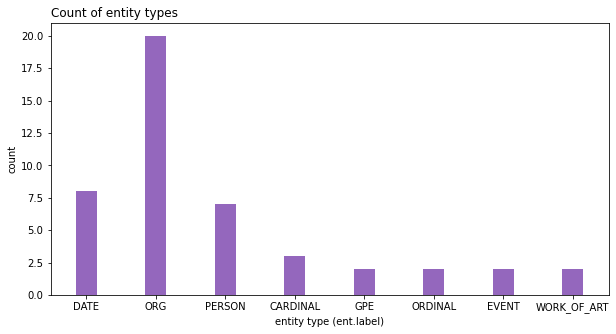

In [9]:
fig = plt.figure(figsize = (10, 5))

plt.bar(counted_ents.keys(), counted_ents.values(), color ="C4", width = 0.3)

plt.xlabel("entity type (ent.label)")
plt.ylabel("count")
plt.title("Count of entity types", loc ='left', )
plt.show()

### Extra: Visualization of annotated entities using displaCy

spaCy also offers an inbuilt tool to visualize the extracted NLP data: **displaCy**.
A visualization of our analysed txt-file with displaCy would look like this:

In [10]:
from spacy import displacy
displacy.render(doc, style="ent")

Now, controlling our results reading the visualization with displaCy, we can spot several mistakes: Only looking at the last news e.g. in the first sentence, 'Apple's App Store' is not recognized as a named entity while it has been at other places, in the same paragraph also 'DealBook Summit' and 'Musk' are not recognized. Also 'Twitter' is recognized as organization, product, and even as a person in one place.
The trained model does not perform well, even though our text is in modern English and coming from the field of journalism with widely used names!